## Supervised SVR regression

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

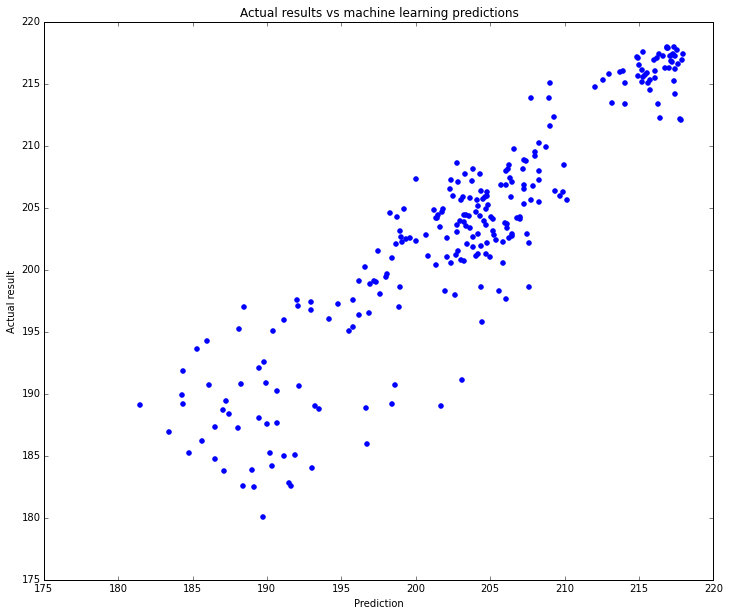

Score on training data
regr.score(X_train, y_train):  0.99150704606 

Score on testing (unseen) data
regr.score(X_test, y_test): 0.84
Mean squared error:  13.9576025824 



---------------------------------------------
Support vector regression






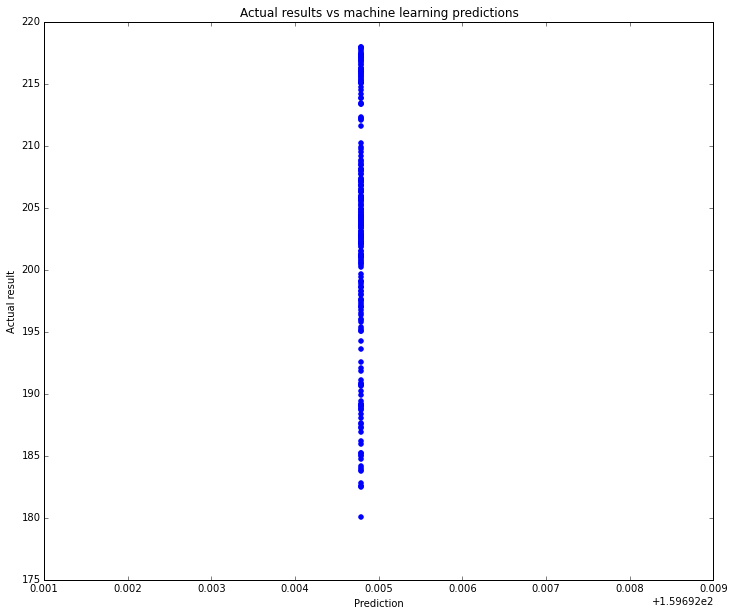

Score on training data
regr.score(X_train, y_train):  0.0561817422577 

Score on testing (unseen) data
regr.score(X_test, y_test): -21.57
Mean squared error:  1974.78300116 



In [3]:
import time
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Support vector regression (SVR)
from sklearn import svm
from sklearn.grid_search import GridSearchCV

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_selected(df, columns, start_index, end_index):
    plot_data(df.ix[start_index:end_index,columns], title="Stock Data")
       
def plot_data(df, title):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    
def train_svr(svr, X, y):
    print "Training {}...".format(svr.__class__.__name__)
    start = time.time()
    
    # parameters for gridsearchCV
    # k = [1,5,10,15,20,25,30]
    # leaves = [1,5,10,15,20,25,30]
    # weights = ['uniform', 'distance']
    # svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5, param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)})
    # kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    kernels = ['linear', 'poly']
    # gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    # Cs = [1e0, 1e1, 1e2, 1e3]
    
    # parameters = {'n_neighbors': k, 'leaf_size': leaves, 'weights': weights}
    # parameters = {'kernel' : kernels, 'gamma' : gammas, 'C' : Cs}
    parameters = {'kernel' : kernels}
    
    # Implement GridSearchCV
    svr = GridSearchCV(svr, parameters, cv=10)
    svr.fit(X, y)
    
    print "best parameter: ", svr.best_params_
    print "best score: ", svr.best_score_
    print "\n"
    
    end = time.time()
    return svr
    
    

def show_supervised_linear_regression():
    
    df = pd.read_csv(symbol_to_path('SPY'), index_col='Date', 
                parse_dates=True, 
                usecols=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
                na_values=['nan'])
    
    # sort data chronologically
    df = df.sort_index(ascending=True, axis=0)
    
    # add new column to view Adj Close 5 days later
    df['Adj_Close_5_Days_Later'] = df['Adj Close']
    df['Adj_Close_5_Days_Later'] = df['Adj_Close_5_Days_Later'].shift(-5)
    
    X_train = df.iloc[0:1000,:-1]
    y_train = df.iloc[0:1000, -1]
    X_test = df.iloc[1000:1253,:-1]
    y_test = df.iloc[1000:1253, -1]
    # X_test = df.iloc[1252:1253,:-1]
    # y_test = df.iloc[1252:1253, -1]
    
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    # Query
    regr.predict(X_test)
    
    # Plot outputs
    print "\n"
    plt.figure(figsize=(12,10))
    plt.title("Actual results vs machine learning predictions")
    plt.xlabel("Prediction")
    plt.ylabel("Actual result")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    
    # Explained variance score: 1 is perfect
    # Score
    print "Score on training data"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    
    print "Score on testing (unseen) data"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    # The mean square error
    print "Mean squared error: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"
    
    # print "\n"
    # print "Prediction: "
    # print regr.predict(X_test)
    
    print "\n"
    print "---------------------------------------------"
    print "Support vector regression"
    print "\n"
    
    # Create linear regression object
    # regr = svm.SVR(kernel = 'poly')
    regr = svm.SVR()
    
    # train gridsearchCV
    # train_svr(regr, X_train, y_train)
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    # Query
    regr.predict(X_test)
    
    # Plot outputs
    print "\n"
    plt.figure(figsize=(12,10))
    plt.title("Actual results vs machine learning predictions")
    plt.xlabel("Prediction")
    plt.ylabel("Actual result")
    plt.scatter(regr.predict(X_test), y_test, color='blue')
    plt.show()
    
    # Explained variance score: 1 is perfect
    # Score
    print "Score on training data"
    print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
    
    print "Score on testing (unseen) data"
    print('regr.score(X_test, y_test): %.2f' % regr.score(X_test, y_test))
    # The mean square error
    print "Mean squared error: ", mean_squared_error(y_test, regr.predict(X_test)), "\n"

if __name__ == "__main__":
    show_supervised_linear_regression()